<a href="https://colab.research.google.com/github/adityerl/super-store-analysis/blob/main/super_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis on Super Store

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# reference https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-pandas-aggregation-results
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# load and read dataset
store = pd.read_csv('SampleSuperstore.csv')

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.000,41.914
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.000,219.582
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.000,6.871
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.577,5,0.450,-383.031
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.200,2.516


### Handle missing values

In [ ]:
# sum the missing values
store.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

there's no missing values

### Handle duplicated values

In [ ]:
# sum the duplicated values
store.duplicated().sum()

17

In [ ]:
# take a closer look
store.loc[store.duplicated(keep=False)].sort_values('Profit', ascending=True)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.300,-12.059
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.300,-12.059
9477,Second Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,3.564,3,0.800,-6.237
8457,Second Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,3.564,3,0.800,-6.237
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.000,3.175
3412,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.000,3.175
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.200,3.629
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.200,3.629
7759,Standard Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Paper,15.552,3,0.200,5.443
5372,Standard Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Paper,15.552,3,0.200,5.443


In [ ]:
# delete the 17 duplicated values
store.drop_duplicates(inplace=True)

store.shape

(9977, 13)

### Delete unnecessary data

In [ ]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.000,41.914
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.000,219.582
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.000,6.871
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.577,5,0.450,-383.031
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.200,2.516


In [ ]:
# look at the unique values for each categorical data
catCol = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']

for cat in catCol:
  print(store[cat].value_counts(), '\n')

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64 

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64 

United States    9977
Name: Country, dtype: int64 

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64 

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indian

In [ ]:
store['City'].nunique(), store['State'].nunique()

(531, 49)

In [ ]:
# look at the central tendency for each numerical column
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000,9977.000,9977.000,9977.000,9977.000
mean,55154.964,230.149,3.791,0.156,28.690
std,32058.267,623.721,2.227,0.206,234.458
min,1040.000,0.444,1.000,0.000,-6599.978
25%,23223.000,17.300,2.000,0.000,1.726
50%,55901.000,54.816,3.000,0.200,8.671
75%,90008.000,209.970,5.000,0.200,29.372
max,99301.000,22638.480,14.000,0.800,8399.976


In [ ]:
# delete unnecessary columns
store.drop(['Country', 'Region', 'Postal Code'], axis=1, inplace=True)

store.shape

(9977, 10)

### Bussines Question

#### Q1: *Which Category and Sub-Category are best selling?*


Create the visualization for Category

In [ ]:
store['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

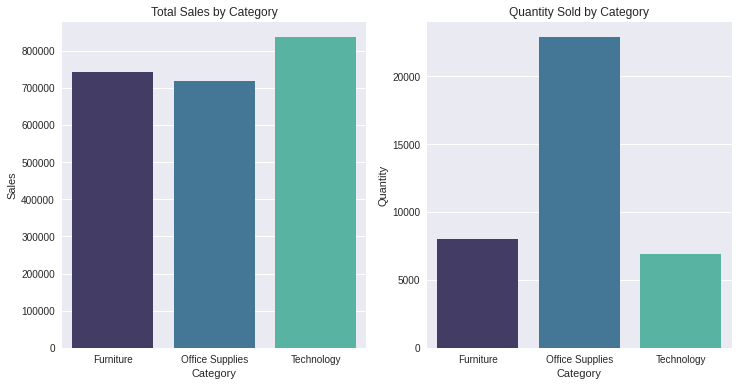

In [ ]:
top_cat = store.groupby('Category')[['Quantity', 'Sales']].sum().reset_index()

# create the viz
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax0 = sns.barplot(
    data=top_cat,
    x='Category',
    y='Sales',
    palette='mako',
    ax=ax[0]
)

ax1 = sns.barplot(
    data=top_cat,
    x='Category',
    y='Quantity',
    palette='mako',
    ax=ax[1]
)

ax0.set_title('Total Sales by Category')
ax1.set_title('Quantity Sold by Category')

ax0.ticklabel_format(style='plain', axis='y');

The highest sales came from the Technology Category, but in terms of quantity, the Office Supplies Category sold the most

Create the visualization for Sub-Category

In [ ]:
store['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

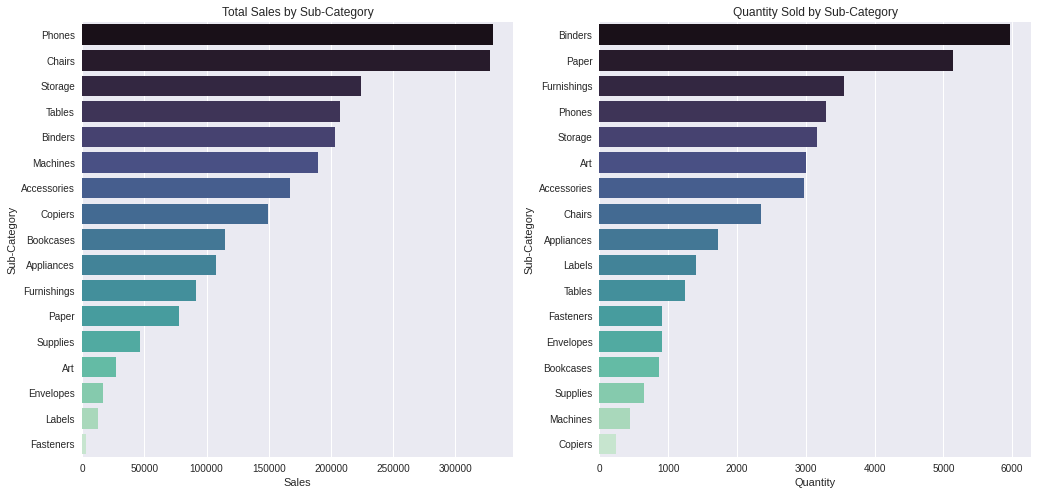

In [ ]:
top_subQ = store.groupby('Sub-Category')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)
top_subS = store.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values('Sales', ascending=False)

# create the viz
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 8))

ax0 = sns.barplot(
    data=top_subS,
    x='Sales',
    y='Sub-Category',
    palette='mako',
    ax=ax[0]
)

ax1 = sns.barplot(
    data=top_subQ,
    x='Quantity',
    y='Sub-Category',
    palette='mako',
    ax=ax[1]
)

ax0.set_title('Total Sales by Sub-Category')
ax1.set_title('Quantity Sold by Sub-Category');

Phone becomes the Sub-Category with the biggest sales, while Binder becomes the Sub-Category with the most quantity sold

#### Q2: *Which City has the highest amount of Sales?*

In [ ]:
store['City'].nunique()

531

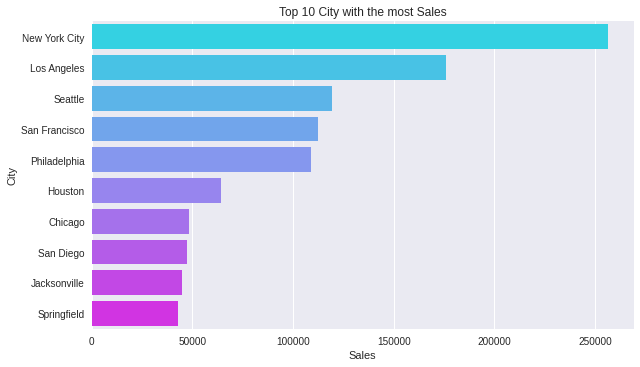

In [ ]:
top_city = store.groupby('City')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).iloc[:10]

# create the viz
sns.catplot(
    kind='bar',
    data=top_city,
    x='Sales',
    y='City',
    height=5,
    aspect=1.8,
    palette='cool'
)

plt.title('Top 10 City with the most Sales');

The City with the most sales is New York

#### Q3: *Which Segments are most profitable? And what did they buy?*

Create the visualization for Segment

In [ ]:
store['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

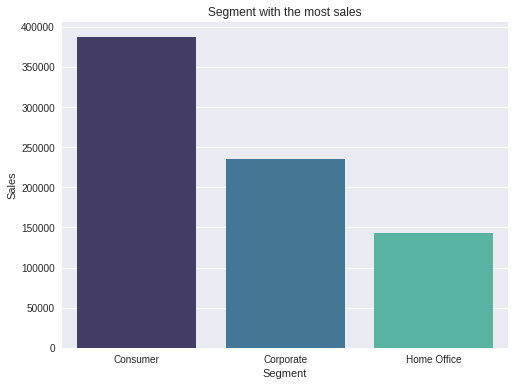

In [ ]:
top_segment = store.groupby(['Segment', 'Category'])[['Sales', 'Quantity']].sum().reset_index()

# create the viz
plt.subplots(figsize=(8, 6))

sns.barplot(
    data=top_segment,
    x='Segment',
    y='Sales',
    palette='mako',
    ci=None
)

plt.title('Segment with the most sales');

Consumer Segment is the most profitable, followed by Corporate and Home Office.

Create the visualization for Segment based on Category

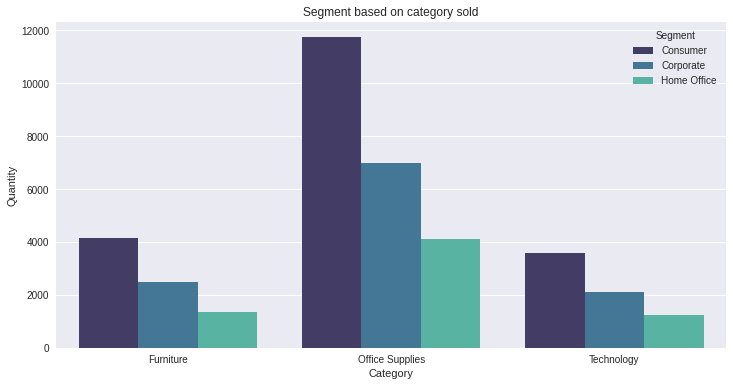

In [ ]:
plt.subplots(figsize=(12, 6))

sns.barplot(
    data=top_segment,
    x='Category',
    y='Quantity',
    hue='Segment',
    palette='mako',
    ci=None
)

plt.title('Segment based on category sold');

As you can see above there is no significant difference, but the Consumer, Corporate and Home Office Segment buys the most in the Office Supplies category

#### Q4: *Which is the Preferred Ship Mode?*


In [ ]:
store['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

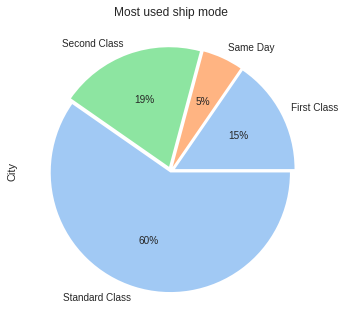

In [ ]:
explode = (0.04, 0.04, 0.04, 0.01)
colors = sns.color_palette('pastel')[:3]

# create the viz
store.groupby('Ship Mode')['City'].count().plot(
    kind='pie',
    y='City',
    autopct='%1.0f%%',
    explode=explode,
    colors=colors
)

plt.title('Most used ship mode');

The most used Ship Mode is Standard Class